<a href="https://colab.research.google.com/github/wandb/examples/blob/master/colabs/wandb-log/Log_(Almost)_Anything_with_W&B_Media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
<!--- @wandbcode{media-video} -->

<img src="https://wandb.me/logo-im-png" width="400" alt="Weights & Biases" />

<!--- @wandbcode{media-video} -->

Use [Weights & Biases](https://wandb.com) for machine learning experiment tracking, dataset versioning, and project collaboration.

<div><img /></div>

<img src="https://wandb.me/mini-diagram" width="650" alt="Weights & Biases" />

<div><img /></div>

# Log (Almost) Anything with W&B Media


In this notebook, we'll show you how to visualize a model's predictions with Weights & Biases – images, videos, audio, tables, HTML, metrics, plots, 3D objects and point clouds.

### Follow along with a [video tutorial →](http://wandb.me/media-video)!
#### View plots in interactive [dashboard →](https://app.wandb.ai/lavanyashukla/visualize-predictions/reports/Visualize-Model-Predictions--Vmlldzo1NjM4OA).



![](https://paper-attachments.dropbox.com/s_C0EC7008D045FC80715C08E7386E0BBDA59DC92DEE34C734FEA67BF25E4BA5CC_1578297638486_image.png)



In [17]:
!pip install wandb -qq

# Fetch audio, video and other data files to log
!git clone https://github.com/wandb/examples.git
!pip install soundfile -qq

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

fatal: destination path 'examples' already exists and is not an empty directory.


In [18]:
import pandas as pd
import numpy as np
import wandb

In [19]:
wandb.login()

True

# Log metrics

In [20]:
# Get Apple stock price data from
# https://www.macrotrends.net/stocks/charts/AAPL/apple/stock-price-history
# Read in dataset
apple = pd.read_csv("examples/examples/data/apple.csv")
apple = apple[-1000:]

In [21]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="metrics")

# Log the metric on each step
for price in apple['close']:
    wandb.log({"Stock Price": price})

wandb.finish()

Stock Price,▁▁▁▁▂▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▄▄▄▄▅▅▆▆▆▅▄▄▄▅▄▅▆▇▇█
Stock Price,299.8


# Log plots

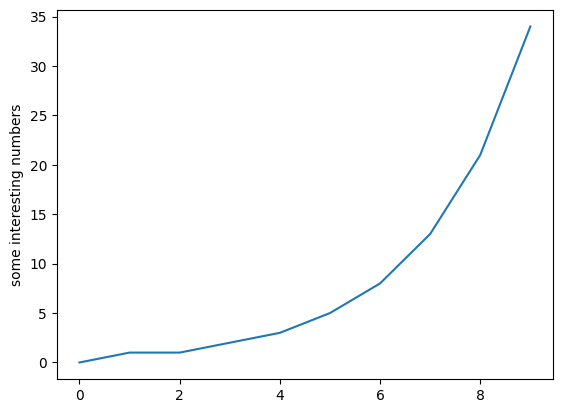

In [22]:
# @title
import matplotlib.pyplot as plt

# Initialize a new run
wandb.init(project="visualize-predictions", name="plots")

# Make the plot
fibonacci = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
fig, ax = plt.subplots()
ax.plot(fibonacci)
ax.set_ylabel("some interesting numbers")

# Log the plot
wandb.log({"plot": fig})
wandb.finish()
fig

# Log Histograms

In [23]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="histograms")

fibonacci = np.array([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])

# Log a histogram on each step
for i in range(1, 10):
  wandb.log({"histograms":
             wandb.Histogram(fibonacci / i)})

wandb.finish()

# Log images

In [24]:
import matplotlib.pyplot as plt

# Initialize a new run
wandb.init(project="visualize-predictions", name="images")

# Generate an image
path_to_img = "examples/examples/data/cafe.jpg"
im = plt.imread(path_to_img)

# Log the image
wandb.log({"img": [wandb.Image(im, caption="Cafe")]})

wandb.finish()

# Log videos

In [25]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="videos")

# Generate a video
path_to_video = "examples/examples/data/openai-gym.mp4"

# Log the video
wandb.log({"video": wandb.Video(path_to_video, fps=4, format="gif")})

wandb.finish()

![](https://api.wandb.ai/files/lavanyashukla/visualize-predictions/0gv4owya/media/videos/openai-gym_89a16925.mp4)

# Log audio

In [26]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="audio")

# Generate audio data
path_to_audio = "examples/examples/data/piano.wav"

# Log that audio data
wandb.log({"examples":
           [wandb.Audio(path_to_audio, caption="Piano", sample_rate=32)]})

wandb.finish()

In [27]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="audio")

# Generate audio data
fs = 44100 # sampling frequency, Hz
length = 3  # length, seconds
xs = np.linspace(0, length, num=fs * length)
waveform = np.sin(fs * 2 * np.pi / 40  * xs ** 2)

# Log audio data
wandb.log({"examples":
           [wandb.Audio(waveform, caption="Boop", sample_rate=fs)]})

wandb.finish()

# Log tables

In [28]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="tables")

# Create tabular data, method 1
data = [["I love my phone", "1", "1"],["My phone sucks", "0", "-1"]]
wandb.log({"a_table": wandb.Table(data=data, columns=["Text", "Predicted Label", "True Label"])})

# Create tabular data, method 2
table = wandb.Table(columns=["Text", "Predicted Label", "True Label"])
table.add_data("I love my phone", "1", "1")
table.add_data("My phone sucks", "0", "-1")
wandb.log({"another_table": table})

wandb.finish()

# Log HTML

In [29]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="html")

# Generate HTML data
path_to_html = "examples/examples/data/some_html.html"

# Log an HTML file
wandb.log({"custom_file": wandb.Html(open(path_to_html))})

# Log raw HTML strings
wandb.log({"custom_string": wandb.Html('<a href="https://mysite">Link</a>')})

wandb.finish()

# Log 3D Objects

In [30]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="3d_objects")

# Generate 3D object data
path_to_obj = "examples/examples/data/wolf.obj"

# Log the 3D object
wandb.log({"3d_object": wandb.Object3D(open(path_to_obj))})

wandb.finish()

# Log Point Clouds

In [31]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="point_clouds")

# Generate a cloud of points
points = np.random.uniform(size=(250, 3))

# Log points and boxes in W&B
wandb.log(
        {
            "point_scene": wandb.Object3D(
                {
                    "type": "lidar/beta",
                    "points": points,
                    "boxes": np.array(
                        [
                            {
                                "corners": [
                                    [0,0,0],
                                    [0,1,0],
                                    [0,0,1],
                                    [1,0,0],
                                    [1,1,0],
                                    [0,1,1],
                                    [1,0,1],
                                    [1,1,1]
                                ],
                                "label": "Box",
                                "color": [123,321,111],
                            },
                            {
                                "corners": [
                                    [0,0,0],
                                    [0,2,0],
                                    [0,0,2],
                                    [2,0,0],
                                    [2,2,0],
                                    [0,2,2],
                                    [2,0,2],
                                    [2,2,2]
                                ],
                                "label": "Box-2",
                                "color": [111,321,0],
                            }
                        ]
                    ),
                    "vectors": np.array([])
                }
            )
        }
    )

wandb.finish()

## More Resources
Check out some other cool things you can do with Weights & Biases:
* [Track model performance](https://app.wandb.ai/lavanyashukla/visualize-models/reports/Visualize-Model-Performance--Vmlldzo1NTk2MA)
* [Visualize sklearn models](https://app.wandb.ai/lavanyashukla/visualize-sklearn/reports/Visualize-Sklearn-Model-Performance--Vmlldzo0ODIzNg)
* [Visualize model predictions](https://app.wandb.ai/lavanyashukla/visualize-predictions/reports/Visualize-Model-Predictions--Vmlldzo1NjM4OA/)